In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.ensemble import VotingRegressor

In [2]:
df = pd.read_csv(r'mmm_final.csv', encoding='latin1')

In [3]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,DEPOT,STOCKIEST NAME,STOCKIEST CODE,HQ,PRODUCTS,PRODUCT DIVISION,PTS,OPENING,RECEIPT,SALES,CL0SING,TRANSIT,T0TAL CL0SING,BRANCH 0UT,RSM,DIVISI0N,ASM,0PENING VALUE,RECEIPT VALUE,SALES VALUE,CLOSING VALUE,TRANSIT VALUE,TOTAL CLOSING VALUE,BRANCH OUT VALUE,MONTH
0,VIJAYAWADA,UMA SHANKAR MEDICAL AGENCIES,330000032,VIJAYAWADA SPARTA,Nixiyax 15 'S,SPARTA,274.58,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01
1,VIJAYAWADA,SAI BHASKAR MEDICAL DISTRIBUTORS,330000005,NELLORE SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,18,0,18,0,18,0,ANAND,SPARTA,MURALI,0.0,2405.34,0.0,2405.34,0.0,2405.34,0,2020-01-01
2,VIJAYAWADA,S.P.D MEDICAL AGENCIES,330000103,NELLORE SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01
3,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Aknay Bar 100GM,SPARTA,128.14,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01
4,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01


In [5]:
df.tail()

,DEPOT,STOCKIEST NAME,STOCKIEST CODE,HQ,PRODUCTS,PRODUCT DIVISION,PTS,OPENING,RECEIPT,SALES,CL0SING,TRANSIT,T0TAL CL0SING,BRANCH 0UT,RSM,DIVISI0N,ASM,0PENING VALUE,RECEIPT VALUE,SALES VALUE,CLOSING VALUE,TRANSIT VALUE,TOTAL CLOSING VALUE,BRANCH OUT VALUE,MONTH
49994,HUBLI,CHIRAG AGENCIES,334206836,MANGALORE SPARTA,Androanagen Solution 100Ml,SPARTA,597.86,5,0,5,0,0,0,0,ANAND,SPARTA,ARPAN GANGULY,2989.30,0.00,2989.30,0.00,0.0,0.00,0,2023-12-31
49995,HUBLI,WEST COAST AGENCIES,317923801,VIZAG SPARTA,Androanagen Tablets 10S,SPARTA,133.63,53,29,0,82,0,82,0,ANAND,SPARTA,ARPAN GANGULY,7082.39,3875.27,0.00,10957.66,0.0,10957.66,0,2023-12-31
49996,BANGALORE,SHIVA SAI PHARMA DISTRIBUTORS,326210349,BANGALORE SPARTA,Nixiyax 15 'S,SPARTA,274.58,90,0,7,83,0,83,0,ANAND,SPARTA,SATHYA K S & ARPAN GANGULY,24712.20,0.00,1922.06,22790.14,0.0,22790.14,0,2023-12-31
49997,AMBALA,MILLENNIUM MEDICARE PVT. LTD.,126300825,KOLHAPUR SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,0,0,0,0,0,0,RAJNEESH,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.0,0.00,0,2023-12-31
49998,HUBLI,INNLIFE DISTRIBUTORS (I) PRIVATE LIMITED,323463746,HUBLI SPARTA,Es Body Wash 200ML,SPARTA,268.47,5,0,0,5,0,5,0,ANAND,SPARTA,ARPAN GANGULY,1342.35,0.00,0.00,1342.35,0.0,1342.35,0,2023-12-31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DEPOT                49999 non-null  object 
 1   STOCKIEST NAME       49999 non-null  object 
 2   STOCKIEST CODE       49999 non-null  int64  
 3   HQ                   49999 non-null  object 
 4   PRODUCTS             49999 non-null  object 
 5   PRODUCT DIVISION     49999 non-null  object 
 6   PTS                  49999 non-null  float64
 7   OPENING              49999 non-null  int64  
 8   RECEIPT              49999 non-null  int64  
 9   SALES                49999 non-null  int64  
 10  CL0SING              49999 non-null  int64  
 11  TRANSIT              49999 non-null  int64  
 12  T0TAL CL0SING        49999 non-null  int64  
 13  BRANCH 0UT           49999 non-null  int64  
 14  RSM                  49999 non-null  object 
 15  DIVISI0N             49999 non-null 

In [7]:
df.describe()

,STOCKIEST CODE,PTS,OPENING,RECEIPT,SALES,CL0SING,TRANSIT,T0TAL CL0SING,BRANCH 0UT,0PENING VALUE,RECEIPT VALUE,SALES VALUE,CLOSING VALUE,TRANSIT VALUE,TOTAL CLOSING VALUE,BRANCH OUT VALUE
count,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.0
mean,2.970419e+08,258.868265,10.889118,3.894938,4.347527,10.436529,0.030041,10.466569,0.0,2501.271704,851.526311,959.556357,2393.241658,5.586927,2398.828585,0.0
std,1.092357e+08,142.545145,17.481891,12.098172,11.783734,18.372566,1.144513,18.434950,0.0,4640.443601,3089.540053,2907.252303,5006.246277,188.004697,5011.526535,0.0
min,1.100000e+08,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.151484e+08,133.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.212467e+08,198.310000,6.000000,0.000000,0.000000,4.000000,0.000000,4.000000,0.0,1134.000000,0.000000,0.000000,756.000000,0.000000,756.000000,0.0
75%,3.500000e+08,317.290000,14.000000,0.000000,4.000000,13.000000,0.000000,13.000000,0.0,3172.900000,0.000000,854.240000,2974.650000,0.000000,2974.650000,0.0
max,4.500000e+08,597.860000,544.000000,300.000000,330.000000,408.000000,180.000000,408.000000,0.0,99247.360000,55600.980000,59188.140000,106419.080000,24053.400000,106419.080000,0.0


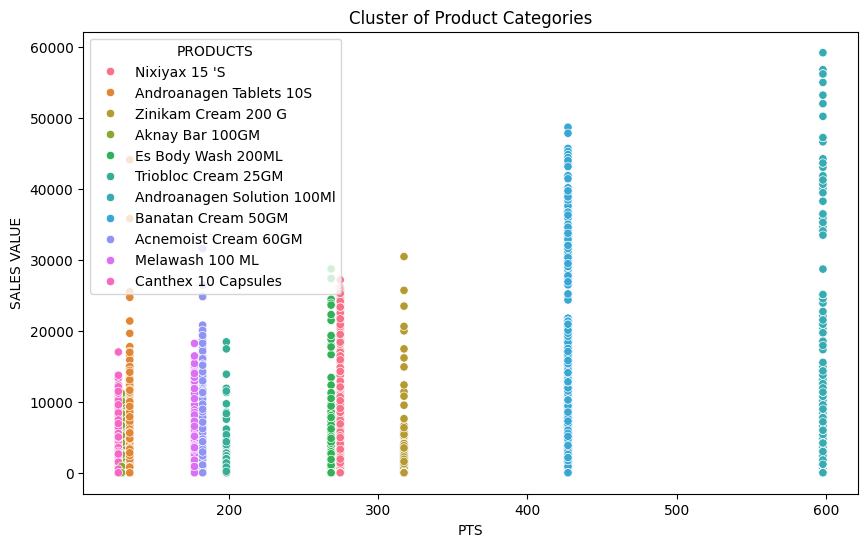

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTS', y='SALES VALUE', hue='PRODUCTS', data=df)
plt.title('Cluster of Product Categories')
plt.xlabel('PTS')
plt.ylabel('SALES VALUE')
plt.show()

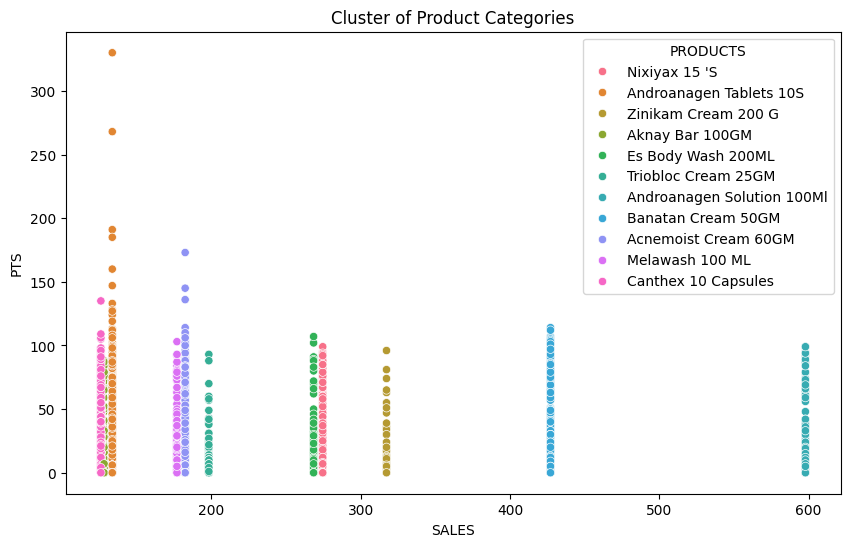

In [9]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTS', y='SALES', hue='PRODUCTS', data=df)
plt.title('Cluster of Product Categories')
plt.xlabel('SALES')
plt.ylabel('PTS')
plt.show()

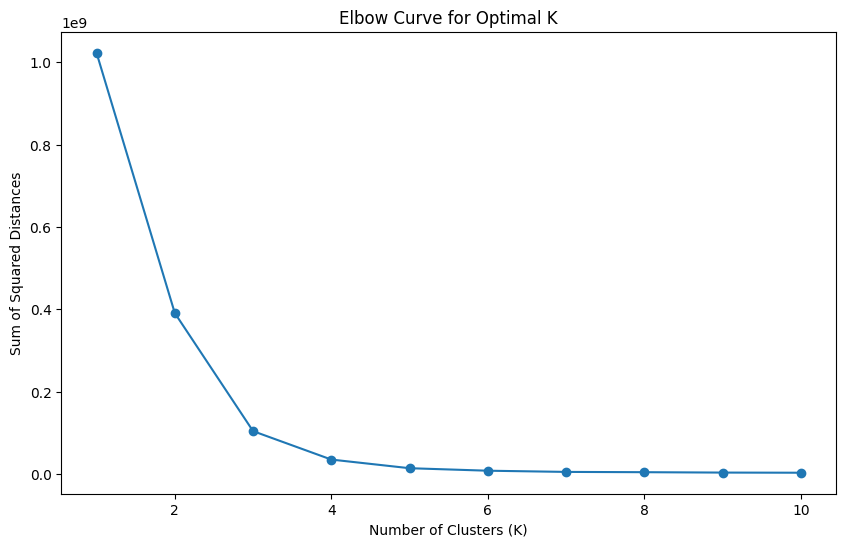

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'PTS' and 'SALES VALUE' are the features you want to use
X = df[['PTS', 'SALES']]

# Range of k values to try
k_values = range(1, 11)

# Sum of squared distances for each k
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [11]:
df.head()

,DEPOT,STOCKIEST NAME,STOCKIEST CODE,HQ,PRODUCTS,PRODUCT DIVISION,PTS,OPENING,RECEIPT,SALES,CL0SING,TRANSIT,T0TAL CL0SING,BRANCH 0UT,RSM,DIVISI0N,ASM,0PENING VALUE,RECEIPT VALUE,SALES VALUE,CLOSING VALUE,TRANSIT VALUE,TOTAL CLOSING VALUE,BRANCH OUT VALUE,MONTH
0,VIJAYAWADA,UMA SHANKAR MEDICAL AGENCIES,330000032,VIJAYAWADA SPARTA,Nixiyax 15 'S,SPARTA,274.58,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01
1,VIJAYAWADA,SAI BHASKAR MEDICAL DISTRIBUTORS,330000005,NELLORE SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,18,0,18,0,18,0,ANAND,SPARTA,MURALI,0.0,2405.34,0.0,2405.34,0.0,2405.34,0,2020-01-01
2,VIJAYAWADA,S.P.D MEDICAL AGENCIES,330000103,NELLORE SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01
3,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Aknay Bar 100GM,SPARTA,128.14,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01
4,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.0,0.00,0.0,0.00,0.0,0.00,0,2020-01-01


OPENING + RECEIPT - SALES = CL0SING	

CL0SING + TRANSIT = T0TAL CL0SING

1 .ALL SALES WHICH IS NEGATIVE MUST BE TRANSFROMED INTO POSITVE VALUE AND MOVE TO TRANSIT.


In [12]:
import numpy as np
import pandas as pd
import pandasql as ps
import math
import itertools 

#matplotlib libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import seaborn as sns

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

#pandas options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#matplotlib setting defaults
sns.set(font="Arial",
        rc={
 "axes.axisbelow": False,
 "axes.edgecolor": "lightgrey",
 "axes.facecolor": "None",
 "axes.grid": False,
 "axes.labelcolor": "dimgrey",
 "axes.spines.right": False,
 "axes.spines.top": False,
 "figure.facecolor": "white",
 "lines.solid_capstyle": "round",
 "patch.edgecolor": "w",
 "patch.force_edgecolor": True,
 "text.color": "dimgrey",
 "xtick.bottom": False,
 "xtick.color": "dimgrey",
 "xtick.direction": "out",
 "xtick.top": False,
 "ytick.color": "dimgrey",
 "ytick.direction": "out",
 "ytick.left": False,
 "ytick.right": False})

In [13]:
def missing_data(input_data):
    '''
    This function returns dataframe with information about the percentage of nulls in each column and the column data type.
    
    input: pandas df
    output: pandas df
    
    '''
    
    total = input_data.isnull().sum()
    percent = (input_data.isnull().sum()/input_data.isnull().count()*100)
    table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    types = []
    for col in input_data.columns: 
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table["Types"] = types
    return(pd.DataFrame(table))

def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    
    
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [14]:
df.head()

,DEPOT,STOCKIEST NAME,STOCKIEST CODE,HQ,PRODUCTS,PRODUCT DIVISION,PTS,OPENING,RECEIPT,SALES,CL0SING,TRANSIT,T0TAL CL0SING,BRANCH 0UT,RSM,DIVISI0N,ASM,0PENING VALUE,RECEIPT VALUE,SALES VALUE,CLOSING VALUE,TRANSIT VALUE,TOTAL CLOSING VALUE,BRANCH OUT VALUE,MONTH
0,VIJAYAWADA,UMA SHANKAR MEDICAL AGENCIES,330000032,VIJAYAWADA SPARTA,Nixiyax 15 'S,SPARTA,274.58,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
1,VIJAYAWADA,SAI BHASKAR MEDICAL DISTRIBUTORS,330000005,NELLORE SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,18,0,18,0,18,0,ANAND,SPARTA,MURALI,0.00,2405.34,0.00,2405.34,0.00,2405.34,0,2020-01-01
2,VIJAYAWADA,S.P.D MEDICAL AGENCIES,330000103,NELLORE SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
3,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Aknay Bar 100GM,SPARTA,128.14,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
4,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01


In [15]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [16]:
df.head()

,depot,stockiest_name,stockiest_code,hq,products,product_division,pts,opening,receipt,sales,cl0sing,transit,t0tal_cl0sing,branch_0ut,rsm,divisi0n,asm,0pening_value,receipt_value,sales_value,closing_value,transit_value,total_closing_value,branch_out_value,month
0,VIJAYAWADA,UMA SHANKAR MEDICAL AGENCIES,330000032,VIJAYAWADA SPARTA,Nixiyax 15 'S,SPARTA,274.58,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
1,VIJAYAWADA,SAI BHASKAR MEDICAL DISTRIBUTORS,330000005,NELLORE SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,18,0,18,0,18,0,ANAND,SPARTA,MURALI,0.00,2405.34,0.00,2405.34,0.00,2405.34,0,2020-01-01
2,VIJAYAWADA,S.P.D MEDICAL AGENCIES,330000103,NELLORE SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
3,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Aknay Bar 100GM,SPARTA,128.14,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
4,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01


In [17]:
df.tail()

,depot,stockiest_name,stockiest_code,hq,products,product_division,pts,opening,receipt,sales,cl0sing,transit,t0tal_cl0sing,branch_0ut,rsm,divisi0n,asm,0pening_value,receipt_value,sales_value,closing_value,transit_value,total_closing_value,branch_out_value,month
49994,HUBLI,CHIRAG AGENCIES,334206836,MANGALORE SPARTA,Androanagen Solution 100Ml,SPARTA,597.86,5,0,5,0,0,0,0,ANAND,SPARTA,ARPAN GANGULY,2989.30,0.00,2989.30,0.00,0.00,0.00,0,2023-12-31
49995,HUBLI,WEST COAST AGENCIES,317923801,VIZAG SPARTA,Androanagen Tablets 10S,SPARTA,133.63,53,29,0,82,0,82,0,ANAND,SPARTA,ARPAN GANGULY,7082.39,3875.27,0.00,10957.66,0.00,10957.66,0,2023-12-31
49996,BANGALORE,SHIVA SAI PHARMA DISTRIBUTORS,326210349,BANGALORE SPARTA,Nixiyax 15 'S,SPARTA,274.58,90,0,7,83,0,83,0,ANAND,SPARTA,SATHYA K S & ARPAN GANGULY,24712.20,0.00,1922.06,22790.14,0.00,22790.14,0,2023-12-31
49997,AMBALA,MILLENNIUM MEDICARE PVT. LTD.,126300825,KOLHAPUR SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,0,0,0,0,0,0,RAJNEESH,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2023-12-31
49998,HUBLI,INNLIFE DISTRIBUTORS (I) PRIVATE LIMITED,323463746,HUBLI SPARTA,Es Body Wash 200ML,SPARTA,268.47,5,0,0,5,0,5,0,ANAND,SPARTA,ARPAN GANGULY,1342.35,0.00,0.00,1342.35,0.00,1342.35,0,2023-12-31


In [18]:
df['month'] = pd.to_datetime(df['month'])
df.rename(columns = {'month':'date'}, inplace = True)

In [19]:
df.head()

,depot,stockiest_name,stockiest_code,hq,products,product_division,pts,opening,receipt,sales,cl0sing,transit,t0tal_cl0sing,branch_0ut,rsm,divisi0n,asm,0pening_value,receipt_value,sales_value,closing_value,transit_value,total_closing_value,branch_out_value,date
0,VIJAYAWADA,UMA SHANKAR MEDICAL AGENCIES,330000032,VIJAYAWADA SPARTA,Nixiyax 15 'S,SPARTA,274.58,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
1,VIJAYAWADA,SAI BHASKAR MEDICAL DISTRIBUTORS,330000005,NELLORE SPARTA,Androanagen Tablets 10S,SPARTA,133.63,0,18,0,18,0,18,0,ANAND,SPARTA,MURALI,0.00,2405.34,0.00,2405.34,0.00,2405.34,0,2020-01-01
2,VIJAYAWADA,S.P.D MEDICAL AGENCIES,330000103,NELLORE SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
3,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Aknay Bar 100GM,SPARTA,128.14,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01
4,VIJAYAWADA,ASWINI ENTERPRISES,330000080,VIJAYAWADA SPARTA,Zinikam Cream 200 G,SPARTA,317.29,0,0,0,0,0,0,0,ANAND,SPARTA,MURALI,0.00,0.00,0.00,0.00,0.00,0.00,0,2020-01-01


In [20]:
df['date'] = pd.to_datetime(df['date'], format= "%Y/%m/%d")

In [21]:
min(df['date']), max(df['date'])

(Timestamp('2020-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [22]:
agg_df = df.groupby(['date','products']).agg({'sales':'sum'}).reset_index().sort_values(['products','date'])
# Assuming 'date' column is in datetime format

# agg_df = (
#     df.groupby([pd.Grouper(key='date', freq='W-Mon'), 'products'])
#     .agg({'sales': 'sum'})
#     .reset_index()
#     .sort_values(['products', 'date'])
# )

In [23]:
agg_df.head()

,date,products,sales
9,2020-01-03,Acnemoist Cream 60GM,7
23,2020-01-06,Acnemoist Cream 60GM,7
30,2020-01-07,Acnemoist Cream 60GM,3
34,2020-01-08,Acnemoist Cream 60GM,4
51,2020-01-11,Acnemoist Cream 60GM,0


In [24]:
agg_df.tail()

,date,products,sales
13622,2023-12-27,Zinikam Cream 200 G,6
13630,2023-12-28,Zinikam Cream 200 G,0
13637,2023-12-29,Zinikam Cream 200 G,0
13646,2023-12-30,Zinikam Cream 200 G,5
13655,2023-12-31,Zinikam Cream 200 G,0


In [25]:
total_sales_df = agg_df.pivot(index='date',columns='products', values='sales')
total_sales_df.head()

products,Acnemoist Cream 60GM,Aknay Bar 100GM,Androanagen Solution 100Ml,Androanagen Tablets 10S,Banatan Cream 50GM,Canthex 10 Capsules,Es Body Wash 200ML,Melawash 100 ML,Nixiyax 15 'S,Triobloc Cream 25GM,Zinikam Cream 200 G
date,,,,,,,,,,,
2020-01-01,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.00
2020-01-02,NaN,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,0.00,NaN
2020-01-03,7.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00
2020-01-04,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN
2020-01-05,NaN,NaN,0.00,3.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN


In [26]:
# total_sales_df = total_sales_df.fillna(0)
#total_sales_df = total_sales_df.fillna(total_sales_df.mean())
# Replace zeros with NaN
total_sales_df.replace(0, np.nan, inplace=True)

# Fill NaN values with the mean of each column
total_sales_df.fillna(1, inplace=True)
total_sales_df.head()

products,Acnemoist Cream 60GM,Aknay Bar 100GM,Androanagen Solution 100Ml,Androanagen Tablets 10S,Banatan Cream 50GM,Canthex 10 Capsules,Es Body Wash 200ML,Melawash 100 ML,Nixiyax 15 'S,Triobloc Cream 25GM,Zinikam Cream 200 G
date,,,,,,,,,,,
2020-01-01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-01-02,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-01-03,7.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00
2020-01-04,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-01-05,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


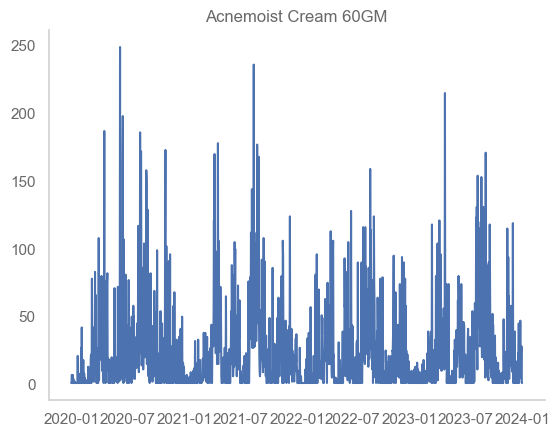

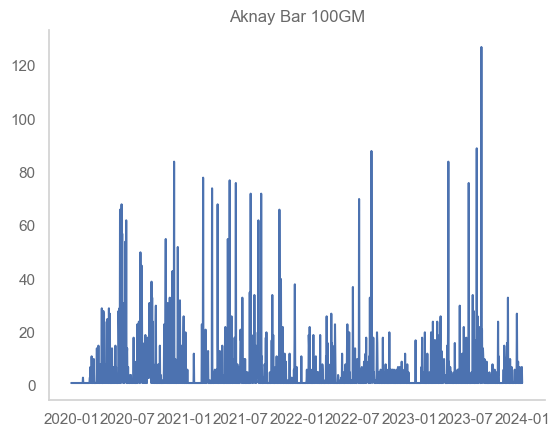

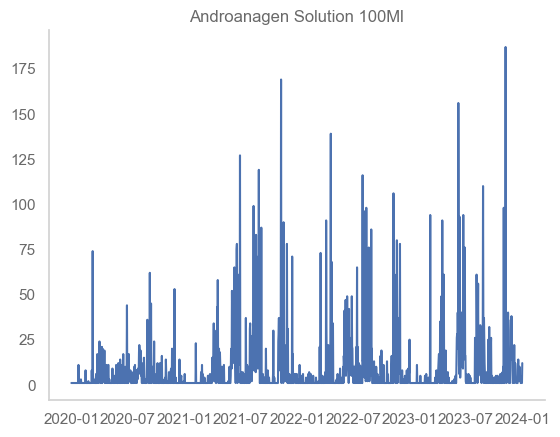

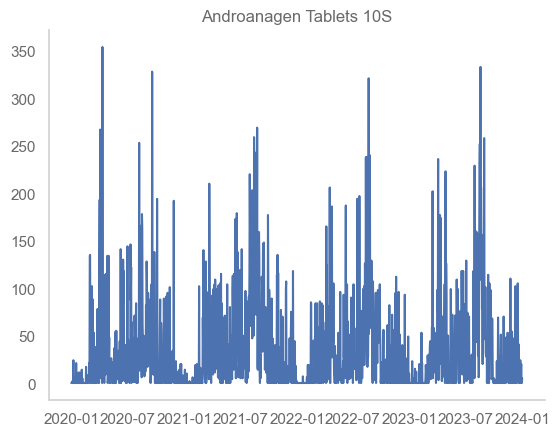

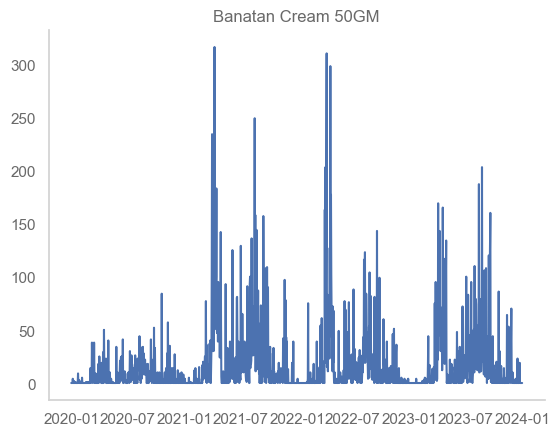

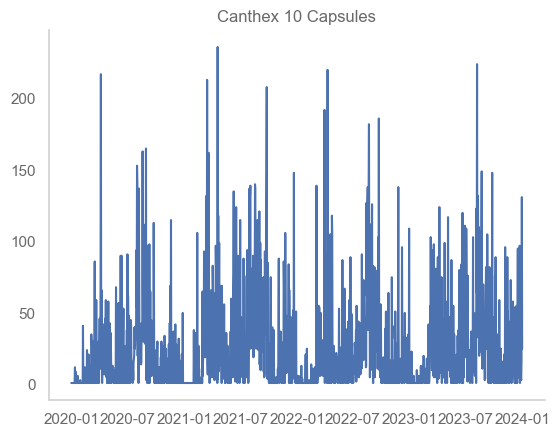

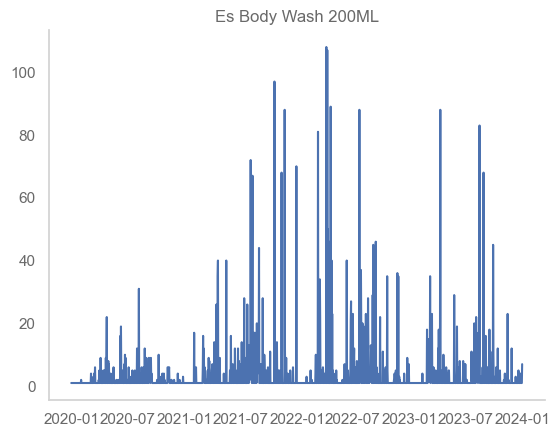

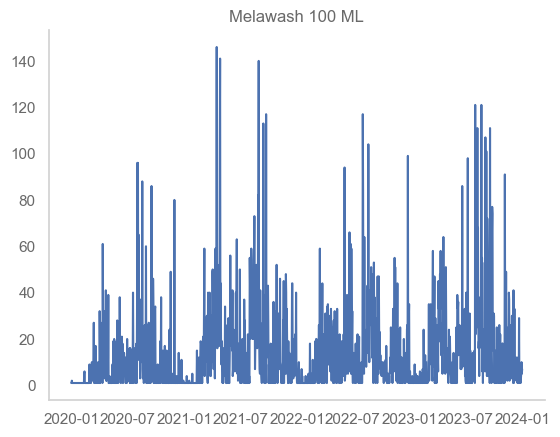

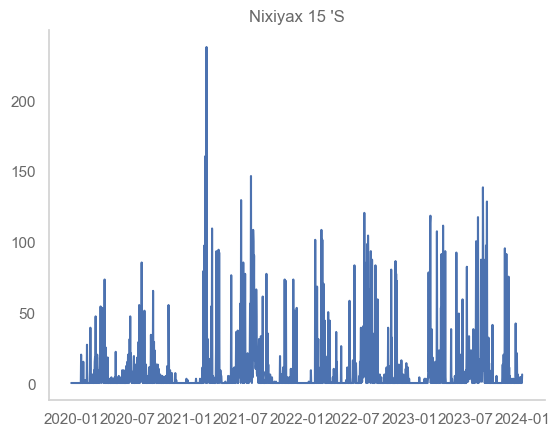

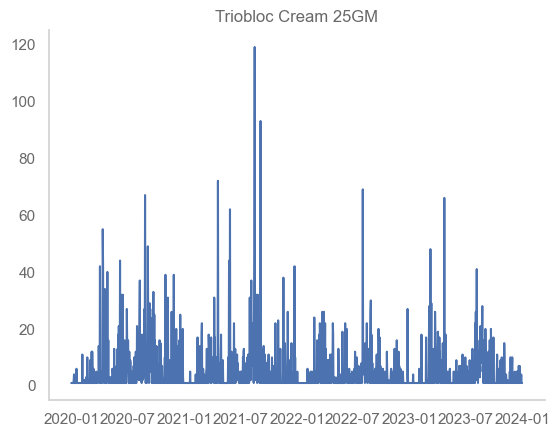

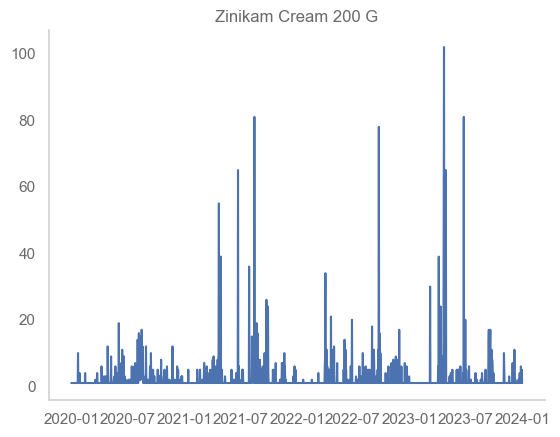

In [27]:
for column in total_sales_df.columns:
    plt.plot(total_sales_df[column])
    plt.title(column)
    plt.show()

In [28]:
total_sales_df = total_sales_df[total_sales_df.index>='2020-01-01']

In [29]:
missing_data(total_sales_df)

,Total,Percent,Types
products,,,
Acnemoist Cream 60GM,0,0.00,float64
Aknay Bar 100GM,0,0.00,float64
Androanagen Solution 100Ml,0,0.00,float64
Androanagen Tablets 10S,0,0.00,float64
Banatan Cream 50GM,0,0.00,float64
Canthex 10 Capsules,0,0.00,float64
Es Body Wash 200ML,0,0.00,float64
Melawash 100 ML,0,0.00,float64
Nixiyax 15 'S,0,0.00,float64


**#Category Grouping**

In [30]:
#lets break it down by thirds for low, mid, high
avg_daily_sales = total_sales_df.apply(np.mean, axis=0).sort_values()
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])

In [31]:
low_vol_columns = list(avg_daily_sales[avg_daily_sales<=low].index)
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid].index

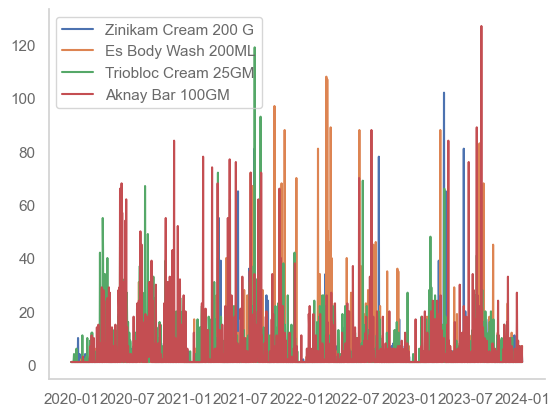

In [32]:
#total_sales_df[low_vol_columns].plot.line()
plt.plot(total_sales_df[low_vol_columns])
plt.legend(low_vol_columns, loc='best') #, bbox_to_anchor=(1.1, 1.1))
plt.show()

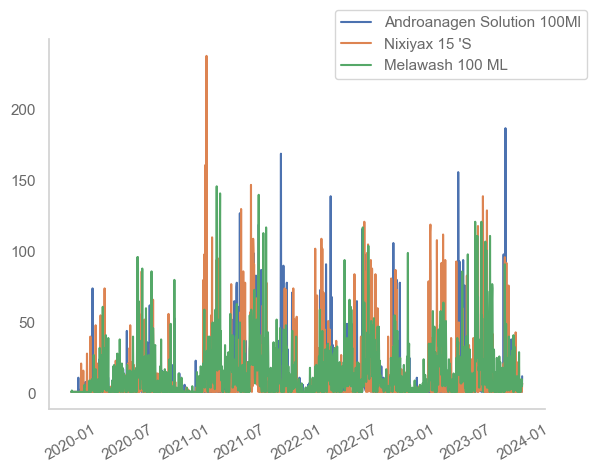

In [33]:
plt.plot(total_sales_df[mid_vol_columns])
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

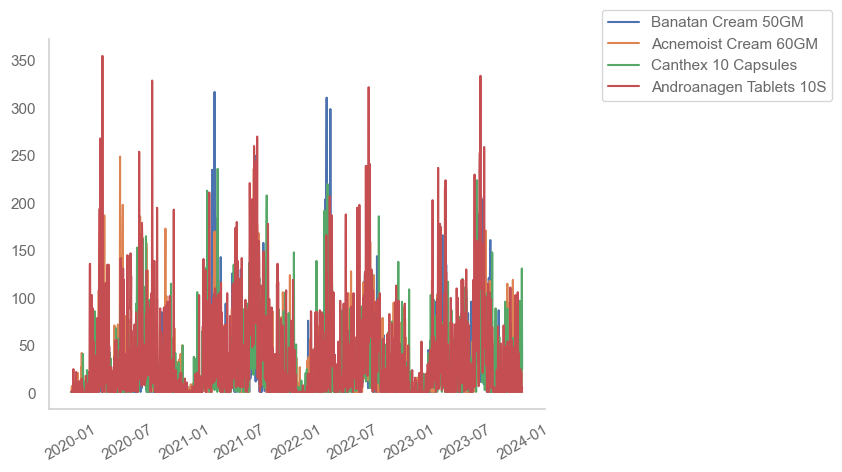

In [34]:
plt.plot(total_sales_df[high_vol_columns])
plt.legend(high_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()


**Let's test things out with a high volume metric first to see if things work. Let's test with "Acnemoist Cream 60GM."**

In [35]:
#setting variables
feature = 'Acnemoist Cream 60GM'
prediction_days = 30

In [36]:
df = total_sales_df[[feature]].reset_index()
df.head()

products,date,Acnemoist Cream 60GM
0,2020-01-01,1.00
1,2020-01-02,1.00
2,2020-01-03,7.00
3,2020-01-04,1.00
4,2020-01-05,1.00


In [37]:
#adding holiday data

holiday = pd.DataFrame([])

ecuador_holidays = holidays.EC()  # this is a dict
# the below is the same, but takes a string:
ecuador_holidays = holidays.country_holidays('EC')  # this is a dict


for date_, name in sorted(holidays.EC(years=[2021,2022,2023]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "EC-Holidays", 'lower_window': -2, 'upper_window': 1}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head()

,ds,holiday,lower_window,upper_window
0,2021-01-01,EC-Holidays,-2,1
1,2021-02-15,EC-Holidays,-2,1
2,2021-02-16,EC-Holidays,-2,1
3,2021-04-02,EC-Holidays,-2,1
4,2021-04-30,EC-Holidays,-2,1


In [38]:
#Variables

forecast_start_dt = date(2023,10,15) #data set ends of (2023,12,1)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2023-10-15


**m = Prophet(growth='linear', changepoint_range = changepoint_range, yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = False, seasonality_mode='multiplicative', holidays=holiday)**

In [39]:
#PROPHET MODEL

df_copy = df.copy()
df_copy = df_copy.rename(columns={'date': 'ds', feature: 'y'})
df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

df_copy['ds'] = pd.to_datetime(df_copy['ds'])

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet()

m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

20:59:28 - cmdstanpy - INFO - Chain [1] start processing
20:59:29 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
predicted_df

,ds,yhat
1383,2023-10-15,8.87
1384,2023-10-16,8.86
1385,2023-10-17,7.47
1386,2023-10-18,9.61
1387,2023-10-19,6.67
1388,2023-10-20,8.22
1389,2023-10-21,8.68
1390,2023-10-22,11.44
1391,2023-10-23,12.34
1392,2023-10-24,11.84


**variable considerations for prophet model: growth, changepoint_prior_scale, changepoint_range, yearly/weekly/daily seasonality, seasonality mode, holidays**

In [41]:
df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)

In [42]:
predicted_df

,ds,yhat,ytrue
0,2023-10-15,8.87,3.00
1,2023-10-16,8.86,10.00
2,2023-10-17,7.47,1.00
3,2023-10-18,9.61,2.00
4,2023-10-19,6.67,1.00
5,2023-10-20,8.22,8.00
6,2023-10-21,8.68,4.00
7,2023-10-22,11.44,1.00
8,2023-10-23,12.34,1.00
9,2023-10-24,11.84,8.00


In [43]:
mape(predicted_df['ytrue'], predicted_df['yhat'])

721.2135439414071

**Cross Validation with Prophet**

Find the "best" parameters by testing over various periods of time with those parameters (cross-validation)

In [44]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days')

20:59:29 - cmdstanpy - INFO - Chain [1] start processing
20:59:29 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/33 [00:00<?, ?it/s]

20:59:29 - cmdstanpy - INFO - Chain [1] start processing
20:59:29 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:31 - cmdstanpy - INFO - Chain [1] start processing
20:59:31 - cmdstanpy - INFO - Chain [1] done processing
20:59:31 - cmdstanpy - INFO - Chain [1] start processing
20:59:31 - cmdstanpy - INFO - Chain [1] done processing
20:59:31 - cmdstanpy - INFO - Chain [1] start processing
20:59:31 - cmdstanpy - INFO - Chain [1]

In [45]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,487.33,22.08,17.21,5.20,1.10,1.02,0.90
1,4 days,547.16,23.39,16.93,5.75,1.05,1.01,0.90
2,5 days,632.15,25.14,17.40,6.15,1.34,1.01,0.89
3,6 days,716.36,26.76,17.48,5.45,0.63,0.90,0.89
4,7 days,644.10,25.38,17.51,4.62,0.63,0.85,0.89
5,8 days,933.11,30.55,19.71,3.97,0.65,0.83,0.87
6,9 days,885.14,29.75,20.07,4.33,0.76,0.91,0.86
7,10 days,1009.78,31.78,21.52,5.16,0.82,0.97,0.84
8,11 days,604.05,24.58,18.35,4.99,0.76,0.93,0.88
9,12 days,729.66,27.01,19.12,4.69,0.86,0.94,0.88


In [46]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
714,2023-01-12,-5.21,-43.52,31.70,1.00,2022-12-18,621.11,False
715,2023-01-13,-4.25,-40.76,31.98,1.00,2022-12-18,525.40,False
712,2023-01-10,-3.74,-38.86,31.61,1.00,2022-12-18,474.43,False
719,2023-01-17,-2.81,-38.92,31.83,1.00,2022-12-18,380.63,False
345,2022-01-08,-2.32,-39.66,37.58,1.00,2021-12-23,332.16,False
350,2022-01-13,-1.60,-42.16,35.42,1.00,2021-12-23,260.15,False
352,2022-01-15,-1.55,-39.49,33.46,1.00,2021-12-23,255.04,False
710,2023-01-08,-1.31,-36.64,34.90,1.00,2022-12-18,230.92,False
707,2023-01-05,-1.14,-36.09,36.60,1.00,2022-12-18,214.38,False
716,2023-01-14,-5.73,-42.88,30.12,6.00,2022-12-18,195.52,False


In [47]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
0,2021-01-28,2.72,-35.49,40.37,1.00,2021-01-27,-171.86,True
1,2021-01-29,12.04,-26.71,48.90,1.00,2021-01-27,-1104.49,True
2,2021-01-30,6.98,-30.95,47.20,10.00,2021-01-27,30.22,False
3,2021-01-31,15.31,-25.42,55.68,1.00,2021-01-27,-1430.81,True
4,2021-02-01,15.68,-22.17,55.56,1.00,2021-01-27,-1467.67,True


In [48]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

20:59:38 - cmdstanpy - INFO - Chain [1] start processing
20:59:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
20:59:54 - cmdstanpy - INFO - Chain [1] start processing
20:59:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
20:59:59 - cmdstanpy - INFO - Chain [1] start processing
20:59:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
21:00:04 - cmdstanpy - INFO - Chain [1] start processing
21:00:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has per

In [49]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale  rmse
0                      0.00                     0.01 29.89
1                      0.00                     0.10 29.73
2                      0.00                     1.00 29.39
3                      0.00                    10.00 29.36
4                      0.01                     0.01 28.05
5                      0.01                     0.10 27.54
6                      0.01                     1.00 27.56
7                      0.01                    10.00 27.53
8                      0.10                     0.01 28.76
9                      0.10                     0.10 27.61
10                     0.10                     1.00 27.61
11                     0.10                    10.00 27.62
12                     0.50                     0.01 29.96
13                     0.50                     0.10 28.08
14                     0.50                     1.00 28.10
15                     0.50                    10.00 28.

In [50]:
tuning_results.sort_values('rmse')

,changepoint_prior_scale,seasonality_prior_scale,rmse
7,0.01,10.00,27.53
5,0.01,0.10,27.54
6,0.01,1.00,27.56
10,0.10,1.00,27.61
9,0.10,0.10,27.61
11,0.10,10.00,27.62
15,0.50,10.00,28.04
4,0.01,0.01,28.05
13,0.50,0.10,28.08
14,0.50,1.00,28.10


In [51]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale    0.01
seasonality_prior_scale   10.00
rmse                      27.53
Name: 0, dtype: float64

In [52]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])

{'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 10.0,
 'rmse': 27.532952711639748}

In [53]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = params_dictionary['changepoint_prior_scale'], 
            seasonality_prior_scale = params_dictionary['seasonality_prior_scale'],
           )

In [54]:
m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)
mape(predicted_df['ytrue'], predicted_df['yhat'])

21:01:03 - cmdstanpy - INFO - Chain [1] start processing
21:01:03 - cmdstanpy - INFO - Chain [1] done processing


735.855912403669

In [ ]:
df = df[]